# Proyek Analisis Data: [Bike Dataset]
- **Nama:** Indars Nurwulandari
- **Email:** indaranr23@gmail.com
- **ID Dicoding:** MC008D5X2388

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1** : Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?
- **Pertanyaan 2** : Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?
- **Pertanyaan 3** : Apakah terdapat perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja?
- **Pertanyaan 4** : Apa hari dengan rata-rata jumlah penjualan terbanyak

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day_df merupakan data penyewaan sepeda antara tahun 2011 dan 2012 berdasarkan harian sedangkan data hour_df merupakan data penyewaan sepeda berdasarkan per jam.
- Pada kedua data, terdapat variabel faktor eksternal seperti cuaca (weathersit, temp, hum, dan windspeed) yang dapat dilakukan analisis lanjutan.

### Assessing Data

**Menilai Data untuk data "day_df"**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada data day_df tidak terdapat missing values dari 731 data dan tidak ada data yang duplikasi.
- Perlu ada penyesuaian tipe data pada beberapa variabel seperti variabel dteday yang bertipe data object namun seharusnya datetime. Selain itu terdapat variabel lain seperti season, holiday, workingday, weathershit yang seharusnya termasuk data kategorik.
- Rata-rata penyewaan 4.504 sepeda per hari, dengan jumlah terbanyak sebesar 8.714 sepeda per hari dan jumlah tersedikit sebesar 22 sepeda per hari.

**Menilai Data untuk Data "Hour"**

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data hour_df juga tidak terdapat missing values dari 731 data dan tidak ada data yang duplikasi.
- Sama seperti data day_df, data hour_df juga perlu ada penyesuaian tipe data pada beberapa variabel seperti variabel dteday yang bertipe data object namun seharusnya datetime. Selain itu terdapat variabel lain seperti season, holiday, workingday, weathershit yang seharusnya termasuk data kategorik.
- Rata-rata penyewaan 189 sepeda per jam, dengan jumlah terbanyak sebesar 977 sepeda per jam dan jumlah tersedikit sebesar 1 sepeda per jam.

### Cleaning Data

**Cleaning Data day_df**
1. Mengubah variabel dteday menjadi tipe data dtime

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

2. Mengubah variabel season, year, mnth, holiday, workingday, dan weathersit menjadi tipe data kategorik

In [16]:
kategori_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[kategori_cols] = day_df[kategori_cols].astype('category')

3. Menghapus variabel instant karena merupakan urutan data dan tidak berpengaruh terhadap analisis

In [17]:
day_df.drop(columns=['instant'], inplace=True)

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

**Cleaning Data hour_df**
1. Mengubah variabel dteday menjadi tipe data dtime

In [19]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

2. Mengubah variabel season, year, mnth, hr, holiday, workingday, dan weathersit menjadi tipe data kategorik

In [20]:
kategori_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[kategori_cols] = hour_df[kategori_cols].astype('category')

3. Menghapus variabel instant karena merupakan urutan data dan tidak berpengaruh terhadap analisis

In [21]:
hour_df.drop(columns=['instant'], inplace=True)

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(8), dateti

**Insight:**
- Pada data day_df dan hour_df, tipe data sudah dirubah dan disesuikan berdasarkan data yang ada
- Pada kedua data, variabel instant dihapus karena tidak memiliki pengaruh terhadap analisa data

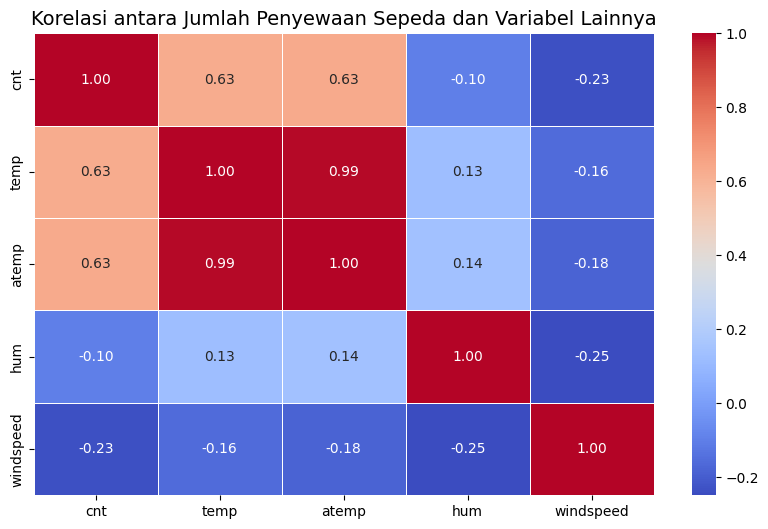

In [23]:
corr_columns = ["cnt", "temp", "atemp", "hum", "windspeed"]

correlation_matrix = day_df[corr_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Korelasi antara Jumlah Penyewaan Sepeda dan Variabel Lainnya", fontsize=14)

plt.show()

**Insight:**
- Berdasarkan heatmap korelasi di atas, jumlah penyewaan sepeda memiliki korelasi positif sedang dengan temp dan atemp yaitu sebesar 0,63. Artinya emakin hangat suhu udara, semakin banyak orang yang menyewa sepeda.
- Jumlah penyewaan sepeda terhadap kelembaban dan kecepatan angin memiliki korelasi negatif, yang artinya semakin tinggi kelembaban dan kecepatan angin, semakin sedikit penyewaan sepeda.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [24]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari data day_df dapat dilihat bahwa dari 4 musim, musim ketiga atau fall adalah yang paling sering muncul sebanyak 188 kali yang artinya musim ini lebih dominan dibandingkan dengan musim lainnya.
- Dari variabel weathershit atau kondisi cuaca, kondisi 1, yaitu Clear, Few clouds, Partly cloudy, Partly cloudy terjadi sebanyak 463 kali, sehingga cuaca paling dominan adalah cuaca cerah.

**Mengelompokkan data berdasarkan cuaca dan musim**

In [25]:
day_df.groupby(by=["season"]).agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
})

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/1849416766.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["season"]).agg({


cnt                                      
            sum         mean   max   min          std
season                                               
1        471348  2604.132597  7836   431  1399.942119
2        918589  4992.331522  8362   795  1695.977235
3       1061129  5644.303191  8714  1115  1459.800381
4        841613  4728.162921  8555    22  1699.615261

**Insight:**
- Dari tabel jumlah penyewaan sepeda berdasarkan musim, penyewaan tertinggi terdapat pada saat musim gugur, yaitu sebesar 1.061.129 sepeda. Dengan rata-rata penyewaan sebesar 5.644 sepeda/hari.
- Sedangkan musim dengan penyewaan terendah adalah pada saat musim semi, yaitu sebesar 471.348 sepeda. Dengan rata-rata penyewaan sebesar 2.604 sepeda/hari.

In [26]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
})


/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/520161659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weathersit").agg({


cnt                                     
                sum         mean   max  min          std
weathersit                                              
1           2257952  4876.786177  8714  431  1879.483989
2            996858  4035.862348  8362  605  1809.109918
3             37869  1803.285714  4639   22  1240.284449

**Insight:**
- Dari tabel jumlah penyewaan sepeda berdasarkan cuaca, penyewaan tertinggi terdapat pada saat cuaca cerah, yaitu sebesar 2.257.952 sepeda. Dengan rata-rata penyewaan sebesar 4.876 sepeda/hari.
- Sedangkan cuaca dengan penyewaan terendah adalah pada saat cuaca cukup buruk (hujan ringan dengan badai petir dan awan tersebar, salju ringan), yaitu sebesar 37.869 sepeda. Dengan rata-rata penyewaan sebesar 1.803 sepeda/hari.

**Mengelompkkan data berdasarkan hari kerja**

In [27]:
day_df.groupby("workingday").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
})

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2542185471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("workingday").agg({


cnt                                     
                sum         mean   max  min          std
workingday                                              
0           1000269  4330.168831  8714  605  2052.141245
1           2292410  4584.820000  8362   22  1878.415583

**Insight:**
- Dapat dilihat bahwa pada hari kerja, lebih banyak sepeda yang disewa, yaitu sebesar 1.000.269 penyewaan dibandingkan dengan hari libur.
- Rata-rata penyewaan pada hari libur adalah sebesar 4.330 sepeda/hari sedangkan pada hari kerja adalah sebesar 4.584 sepeda/hari.

**Mengelompokkan data penyewaan sepeda per hari**

In [28]:
day_df.groupby("weekday")["cnt"].mean().sort_values(ascending=False)

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2146653375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("weekday")["cnt"].mean().sort_values(ascending=False)


weekday
5    4690.288462
4    4667.259615
6    4550.542857
3    4548.538462
2    4510.663462
1    4338.123810
0    4228.828571
Name: cnt, dtype: float64

**Insight:**
- Dapat dilihat bahwa rata-rata penyewaan sepeda tertinggi terdapat pada hari jumat, yaitu sebesar 4.690 sepeda/hari. Sedangkan penyewaan sepeda terendah pada hari minggu, yaitu sebesar 4228 sepeda/hari.

### Explore data hour_df

In [29]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dapat dilihat bahwa jam 17:00 memiliki jumlah data tertinggi. Hal ini bisa mengindikasikan bahwa jam sore hari setelah jam kerja (rush hour) adalah waktu dengan penyewaan sepeda tertinggi.

**Mengelompokkan data berdasarkan jam**

In [30]:
hour_df.groupby("hr").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
})

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/3762046897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("hr").agg({


cnt                                 
       sum        mean  max min         std
hr                                         
0    39130   53.898072  283   2   42.307910
1    24164   33.375691  168   1   33.538727
2    16352   22.869930  132   1   26.578642
3     8174   11.727403   79   1   13.239190
4     4428    6.352941   28   1    4.143818
5    14261   19.889819   66   1   13.200765
6    55132   76.044138  213   1   55.084348
7   154171  212.064649  596   1  161.441936
8   261001  359.011004  839   5  235.189285
9   159438  219.309491  426  14   93.703458
10  126257  173.668501  539   8  102.205413
11  151320  208.143054  663  10  127.495536
12  184414  253.315934  776   3  145.081134
13  184919  253.661180  760  11  148.107657
14  175652  240.949246  750  12  147.271574
15  183149  251.233196  750   7  144.632541
16  227748  311.983562  783  11  148.682618
17  336860  461.452055  976  15  232.656611
18  309772  425.510989  977  23  224.639304
19  226789  311.523352  743  11  161.050359
20  164550  226.030220  567  11  119.670164
21  125445  172.314560  584   6   89.788893
22   95612  131.335165  502   9   69.937782
23   63941   87.831044  256   2   50.846889

**Insight:**
- Dapat dilihat bahwa jam 17:00 memiliki jumlah penyewaan sepeda terbanyak, yaitu dengan total 336.860 sepeda. Dengan rata-rata 461 sepeda/jam.
- Jam dengan penyewaan terendah adalah pada pukul 4:00, yaitu sebesar 4.428 sepeda. Dengan rata-rata 6 sepeda/jam.
- Hal ini menunjukkan bahwa penyewaan sepeda paling banyak terjadi antara jam 16:00 - 19:00 (4-7 PM) sedangkan penyewaan paling rendah terjadi pada jam 3-5 pagi. Hal ini dapat dilihat dari rata-rata dan total penyewaan sepeda per jam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/695507477.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/695507477.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  weather_avg["weathersit"] = weather_avg["weathersit"].replace(weather_mapping)
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/695507477.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

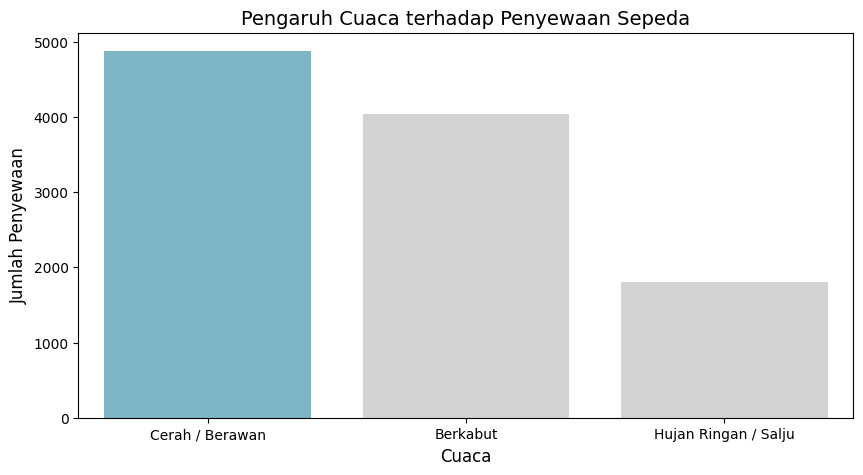

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()

weather_mapping = {
    1: "Cerah / Berawan",
    2: "Berkabut",
    3: "Hujan Ringan / Salju",
    4: "Hujan Lebat / Badai"
}
weather_avg["weathersit"] = weather_avg["weathersit"].replace(weather_mapping)

max_weather = weather_avg["cnt"].max()

colors = ["#72BCD4" if cnt == max_weather else "#D3D3D3" for cnt in weather_avg["cnt"]]

sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette=colors, ax=ax)

ax.set_title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
ax.set_xlabel("Cuaca", fontsize=12)
ax.set_ylabel("Jumlah Penyewaan", fontsize=12)

plt.show()


/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2996738710.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = day_df.groupby("season")["cnt"].mean().reset_index()
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2996738710.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  season_avg["season"] = season_avg["season"].replace(season_mapping)
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2996738710.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

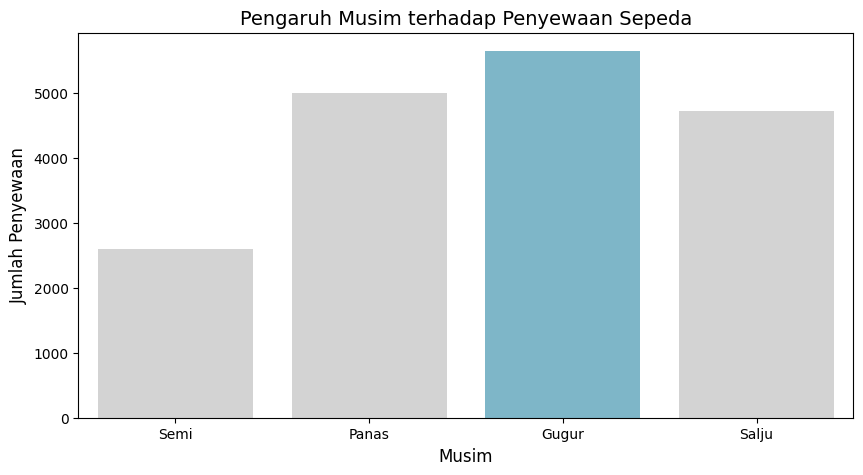

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

season_avg = day_df.groupby("season")["cnt"].mean().reset_index()

season_mapping = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Salju"}
season_avg["season"] = season_avg["season"].replace(season_mapping)
max_season = season_avg["cnt"].max()


colors = ["#72BCD4" if cnt == max_season else "#D3D3D3" for cnt in season_avg["cnt"]]
sns.barplot(x="season", y="cnt", data=season_avg, palette=colors, ax=ax)

ax.set_title("Pengaruh Musim terhadap Penyewaan Sepeda", fontsize=14)
ax.set_xlabel("Musim", fontsize=12)
ax.set_ylabel("Jumlah Penyewaan", fontsize=12)

plt.show()

**Insight:**
- Dari barplot tersebut, dapat dilihat bahwa cuaca memiliki pengaruh terhadap jumlah penyewaan sepeda. Pada saat cuaca cerah (langit cerah atau sedikit berawan) jumlah penyewaan/hari lebih besar dibandingkan dengan cuaca lainnya, yaitu saat cuaca berawan dan berkabut. Namun, penyewaan sepeda paling rendah adalah saat cuaca hujan dan salju ringan.
- Dari data yang ada, tidak ada penyewaan sepeda saat cuaca ekstrem (Hujan deras dengan butiran es, badai petir, dan kabut) Hal ini mungkin terjadi karena kondisi yang berbahaya dan tidak nyaman.
- Selain cuaca, musim juga memiliki pengaruh terhadap jumlah penyewaan sepeda. Banyak penyewa paling tinggi adalah saat musim gugur kemudian diikuti oleh musim panas. Kemudian untuk musim yang memiliki jumlah penyewaan terendah adalah saat musim semi.

### Pertanyaan 2: Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/4108989299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly = hour_df.groupby("hr")["cnt"].sum().reset_index()


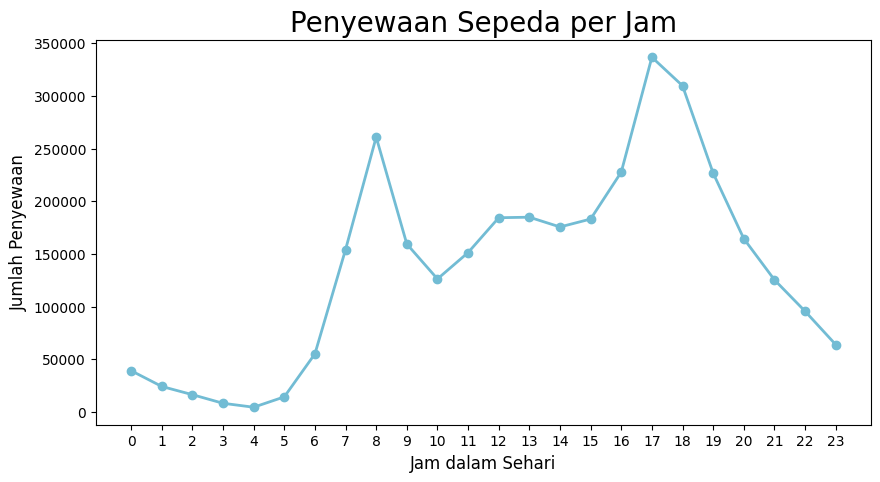

In [33]:
hourly = hour_df.groupby("hr")["cnt"].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(
    hourly["hr"],
    hourly["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Penyewaan Sepeda per Jam", loc="center", fontsize=20)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Insight:**
- Berdasarkan lineplot tersebut, puncak penyewaan sepeda tertinggi adalah pada saat pukul 17:00 - 18:00. Kemudian setelah itu penyewaan sepeda akan menurun secara bertahap dan paling rendah adalah pada pukul 04:00. 
- Selain itu, terdapat penyewaan cukup meningkat di pagi hari, yaitu puncaknya pada pukul 08:00. Selanjutkan mengalami penurunan lagi namun cenderung stabil diantara pukul 09:00 - 16:00.

### Pertanyaan 3: Apakah terdapat perbedaan jumlah penyewaan sepeda pada hari libur dan hari kerja?

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/1654902512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=day_df, palette=["#72BCD4"])
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/1654902512.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="workingday", y="cnt", data=day_df, palette=["#72BCD4"])


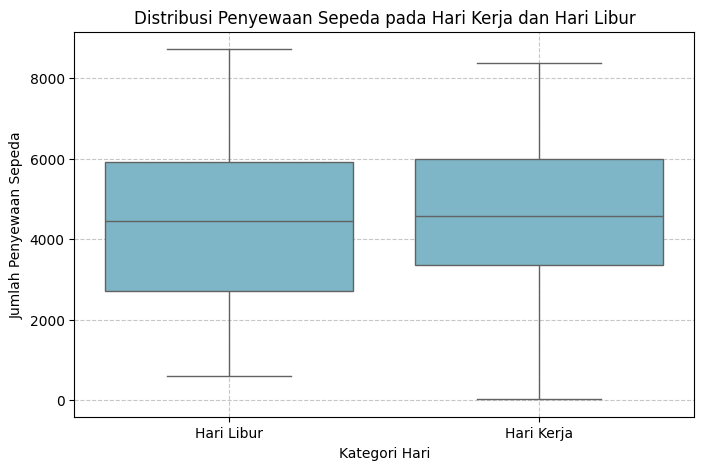

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", data=day_df, palette=["#72BCD4"])
plt.xticks([0, 1], ["Hari Libur", "Hari Kerja"]) 
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda pada Hari Kerja dan Hari Libur")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Berdasarkan nilai mediannya, dapat dilihat bahwa median dari jumlah penyewaan pada hari kerja lebih tinggi dibandingkan dengan hari libur. 
- Penyebaran data pada kedua kategori cukup mirip, namun rentang penyewaan pada hari libur lebih bervariasi di kuartil bawah (lebih banyak hari dengan jumlah penyewaan rendah).
- Sehingga dapat disimpulkan bahwa berdasarkan mediannya, jumlah penyewaan sepeda per harinya lebih banyak di hari kerja dibandingkan dengan di hari libur.

### Pertanyaan 4: Apa hari dengan rata-rata jumlah penyewaan terbanyak

/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2596729170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rent_per_day = day_df.groupby("weekday")["cnt"].mean().reset_index()
/var/folders/m2/f0dmk8qn71593x9d7n6nlxl00000gn/T/ipykernel_8605/2596729170.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  avg_rent_per_day["weekday"] = avg_rent_per_day["weekday"].replace(day_mapping)


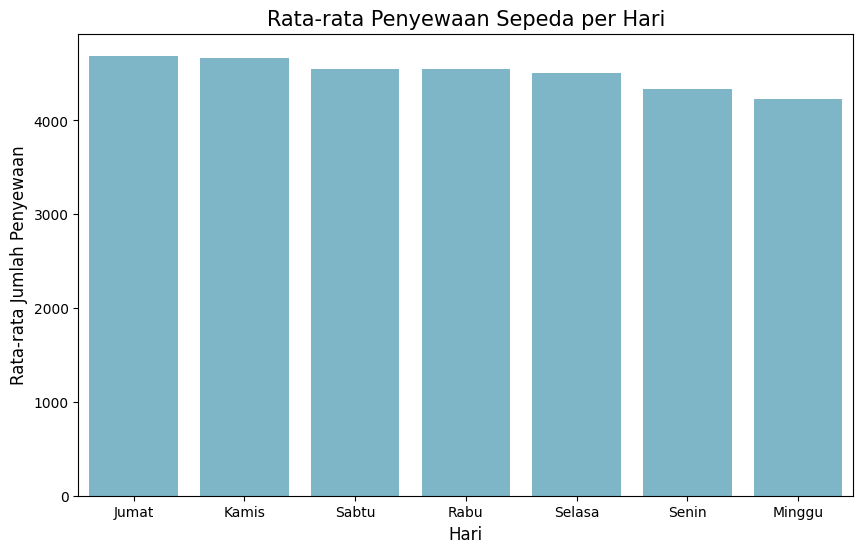

In [37]:
avg_rent_per_day = day_df.groupby("weekday")["cnt"].mean().reset_index()
day_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
avg_rent_per_day["weekday"] = avg_rent_per_day["weekday"].replace(day_mapping)
avg_rent_per_day = avg_rent_per_day.sort_values(by="cnt", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="cnt", data=avg_rent_per_day, color="#72BCD4", order=avg_rent_per_day["weekday"])  

plt.title("Rata-rata Penyewaan Sepeda per Hari", fontsize=15)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)

plt.show()


**Insight:**
- Berdasarkan barplot tersebut dapat dilihat bahwa rata-rata penyewaan sepeda per hari hampir sama, namun paling tinggi adalah saat hari jumat dan paling rendah adalah hari minggu.

## Analisis Lanjutan (Opsional)

### Apakah lebih banyak hari dengan penyewaan rendah, sedang, atau tinggi?

In [ ]:
def categorize_rentals(cnt):
    if cnt <= 3000:
        return 'Rendah'
    elif 3001 <= cnt <= 5000:
        return 'Sedang'
    else:
        return 'Tinggi'


day_df['Kategori_Penyewaan'] = day_df['cnt'].apply(categorize_rentals)
category_counts = day_df['Kategori_Penyewaan'].value_counts()

print(category_counts)

most_frequent_category = category_counts.idxmax()
print(f"\nKategori yang paling banyak harinya adalah: {most_frequent_category}")


Kategori_Penyewaan
Tinggi    286
Sedang    273
Rendah    172
Name: count, dtype: int64

Kategori yang paling banyak harinya adalah: Tinggi


**insight:**
- Berdasarkan data yang dimiliki, jika lebih dari 5000 penyewaan per hari dikatakan kategori tinggi, maka mayoritas penyewaan tinggi untuk per hari nya. 
- Sebanyak 286 hari memiliki penyewaan tinggi (lebih dari 5000), 273 hari memiliki tingkat penyewaan sedang, dan 172 hari memiliki tingkat penyewaan rendah (kurang dari 3000)

## Conclusion

- Cuaca cerah atau sedikit berawan meningkatkan jumlah penyewaan sepeda, sementara hujan, salju ringan, dan cuaca ekstrem menurunkan jumlah penyewaan. Selain itu, pada musim gugur penyewaan sepeda cenderung tinggi dibandingkan dengan musim lainnya.
- Penyewaan sepeda memuncak pada pukul 17:00 - 18:00 dan terendah adalah pukul 04:00
- Pola penyewaan berdasarkan hari kerja dan har libur, hari kerja memiliki median penyewaan lebih tinggi dibandingkan dengan hari libur
- Rata-rata penyewaan per hari relatif stabil, tetapi hari Jumat memiliki penyewaan tertinggi, sementara hari Minggu paling rendah.

**Strategi bisnis**
- Untuk waktu tertentu seperti jam sibuk (pukul 17:00 - 18:00) harga dapat dinaikkan karena peminatan tinggi.
- Memberikan diskon atau promo saat cuaca buruk atau musim semi agar pelanggan tertarik dan dapat meningkatkan penyewaan sepeda.

Simpan hasil

In [42]:
day_df.to_csv('/Users/macbook/Downloads/Bike-sharing-dataset/data_day.csv', index=False)
hour_df.to_csv('/Users/macbook/Downloads/Bike-sharing-dataset/data_hour.csv', index=False)